# Regresión Logística

Debe su nombre a la función logística empleada que arroja una probabilidad ante un evento $x$ de modo que

$$

p(x) = \frac{1}{1+e^{-(x-\mu)/s}}

$$

Esto arroja una curva como la siguiente.

![logit](https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Exam_pass_logistic_curve.svg/400px-Exam_pass_logistic_curve.svg.png)

De manera que puede emplearse en la asociación probabilística de pertenecer a dos categorías (la clase 0 y la clase 1).

Veamos si podemos iniciarnos en esto de la clasificación con un ejemplo sencillo. En este caso disponemos de información sobre usuarios y queremos etiquetarlos en tres categorías. Para esto, el modelo implementado entrenará varias regresiones logísticas con lo que se conocer _one-vs-rest_.

In [2]:
import pandas as pd

dataframe = pd.read_csv("data/usuarios_win_mac_lin.csv")

clases = {
    0: 'Windows',
    1: 'Linux',
    2: 'Mac'
}

dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [3]:
dataframe['clase'].value_counts(normalize=True)

clase
0    0.505882
2    0.258824
1    0.235294
Name: proportion, dtype: float64

In [4]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


Vemos que tenemos una mayor presencia de casos del tipo 0.

In [5]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


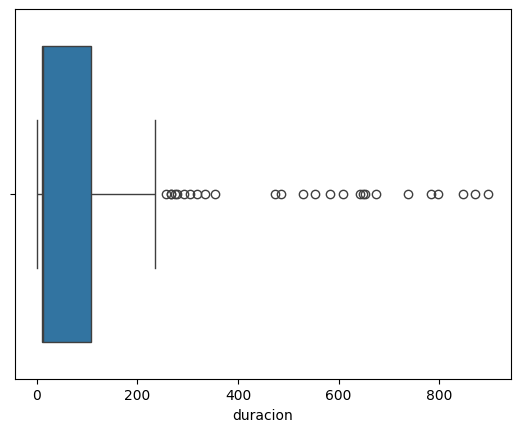

In [6]:
import seaborn as sns

sns.boxplot(x= dataframe['duracion']);

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


Veamos qué pinta tienen nuestras variables de forma individual.

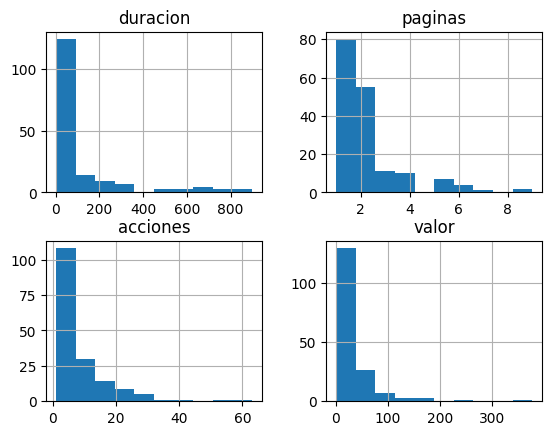

In [8]:
import matplotlib.pyplot as plt

dataframe.drop(['clase'], axis=1).hist()
plt.show()

Tenemos una gran prevalencia de valores menores en todos los casos. Habrá que ver si pertenecen a una categoría en concreto o es una simple concentración de la distribución de los valores.

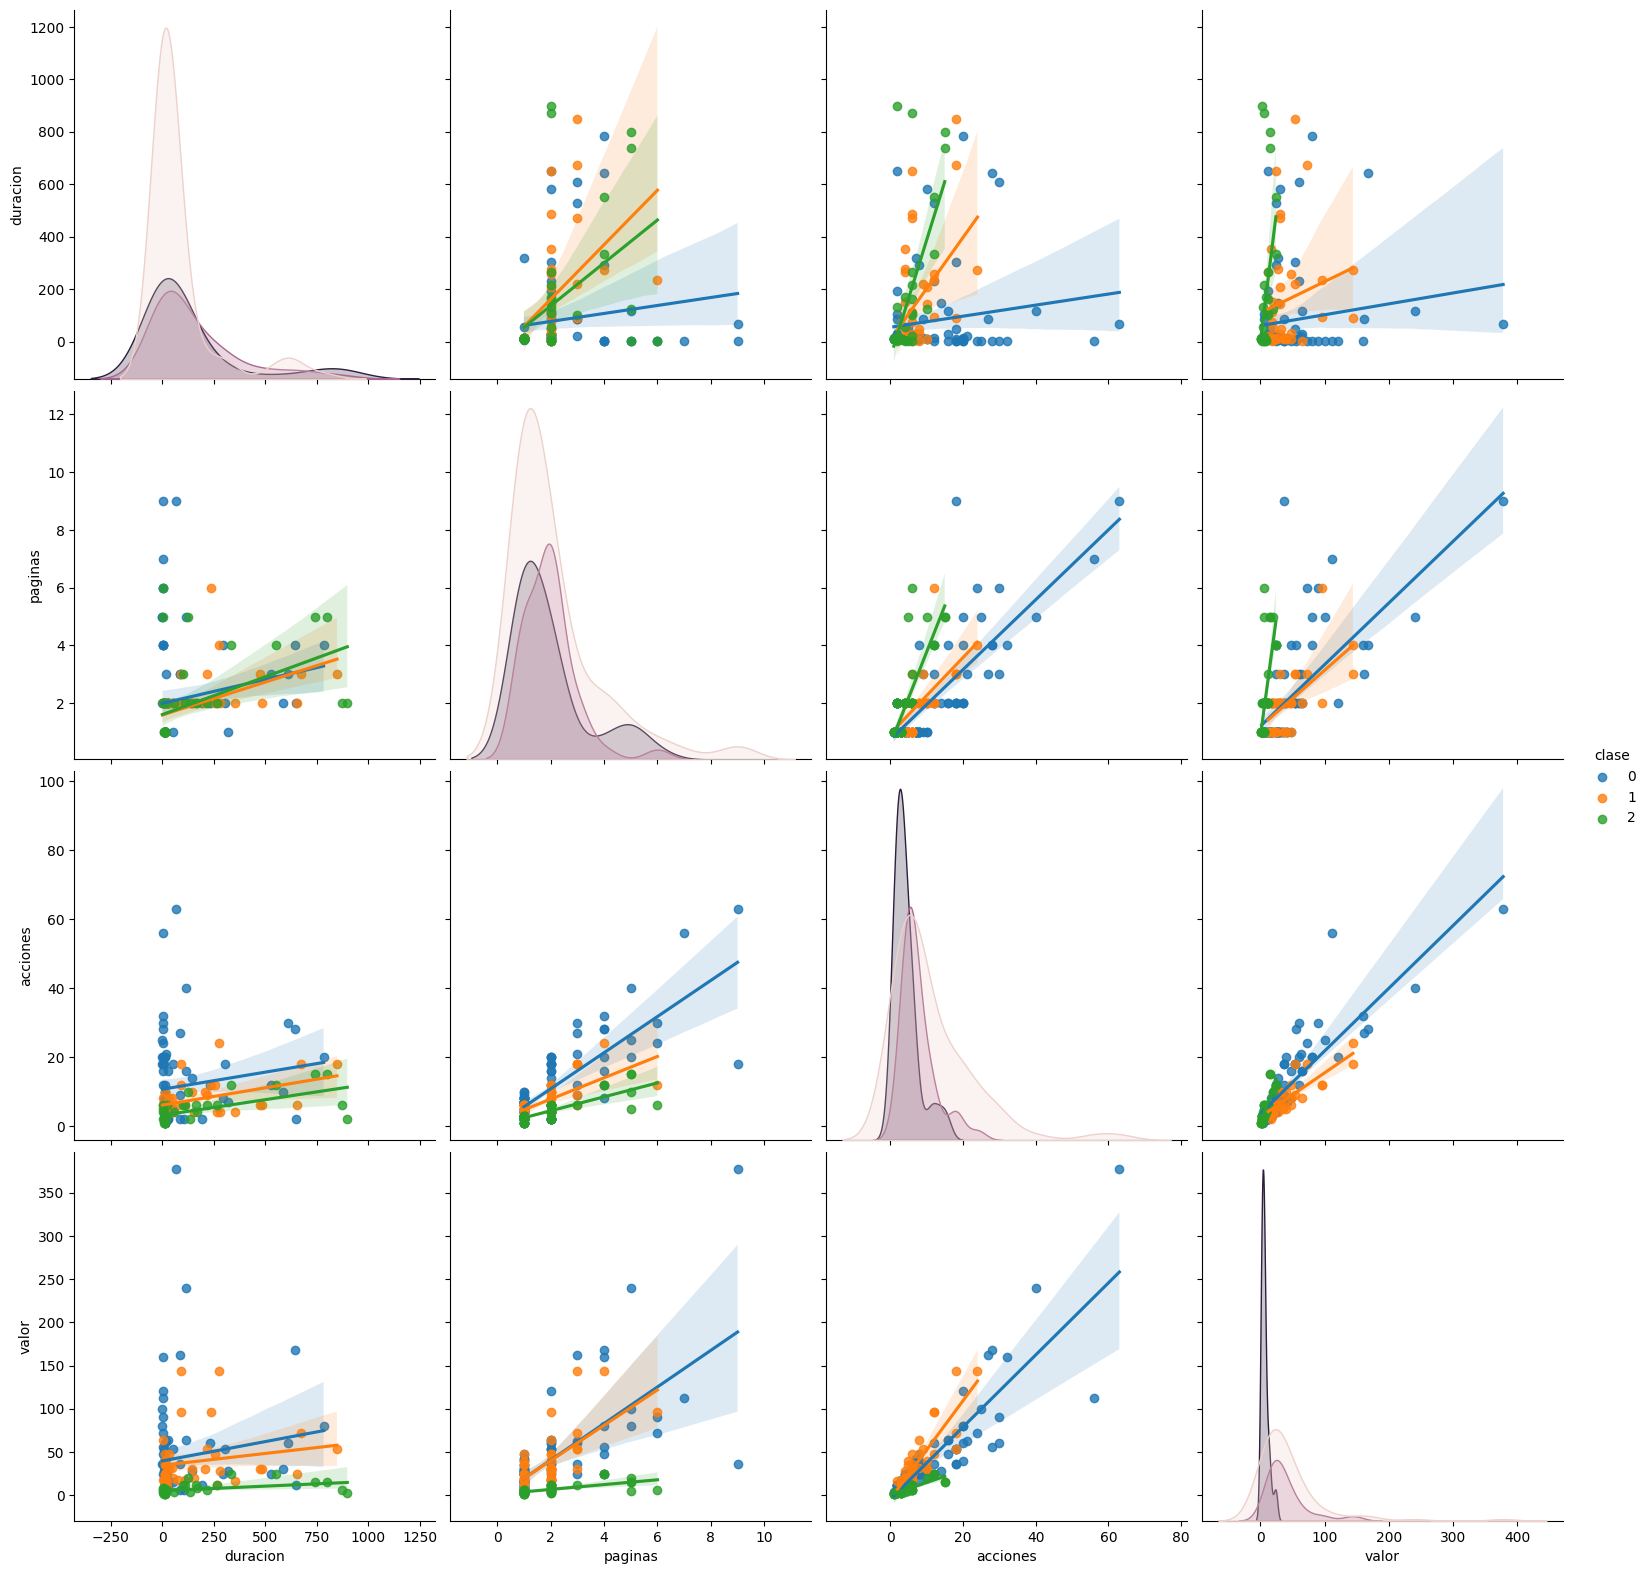

In [9]:
sns.pairplot(dataframe.dropna(),
            hue='clase',
            height=4,
            vars=["duracion", "paginas","acciones","valor"],
            kind='reg'); # "reg" de regresión lineal

A simple vista, acciones y páginas son dos características que muestran una alta correlación y puede que esto nos ayuda a separar entre las tres categorías objetivo.

## Creamos el modelo

In [10]:
import numpy as np

X = np.array(dataframe.drop(columns=['clase']))
y = np.array(dataframe['clase'])

In [11]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

LogisticRegression(max_iter=1000)

Podemos ver las predicciones realizadas.

In [12]:
predictions = model.predict(X)

print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


Así como la probabilidad empleada en cada caso para las tres categorías.

In [13]:
predicions_proba = model.predict_proba(X)

print(np.round(np.array(predicions_proba), 2))

[[0.22 0.09 0.69]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.18 0.08 0.74]
 [0.28 0.1  0.62]
 [0.27 0.08 0.65]
 [0.05 0.05 0.91]
 [0.22 0.09 0.69]
 [0.09 0.06 0.84]
 [0.   0.   1.  ]
 [0.12 0.07 0.8 ]
 [0.32 0.09 0.59]
 [0.1  0.06 0.84]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.23 0.09 0.68]
 [0.   0.   1.  ]
 [0.65 0.34 0.01]
 [0.58 0.42 0.  ]
 [0.73 0.27 0.  ]
 [0.71 0.29 0.  ]
 [0.32 0.68 0.  ]
 [0.82 0.18 0.  ]
 [0.46 0.54 0.  ]
 [0.78 0.22 0.  ]
 [0.37 0.63 0.  ]
 [0.09 0.91 0.  ]
 [0.72 0.28 0.  ]
 [0.45 0.52 0.03]
 [0.5  0.5  0.  ]
 [0.35 0.65 0.  ]
 [0.22 0.78 0.  ]
 [0.26 0.74 0.  ]
 [0.22 0.78 0.  ]
 [0.64 0.36 0.  ]
 [0.01 0.   0.99]
 [0.03 0.02 0.95]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.   0.   1.  ]
 [0.81 0.19 0.  ]
 [0.61 0.39 0.  ]
 [0.54 0.46 0.  ]
 [0.23 0.77 0.  ]
 [0.68 0.32 0.  ]
 [0.28 0.72 0.  ]
 [0.57 0.43 0.  ]
 [0.41 0.59 0.  ]
 [0.76 0.24 0.  ]
 [0.99 0.01 0.  ]
 [0.77 0.23 0.  ]
 [0.78 0.22 0.  ]
 [0.97 0.03 0.  ]
 [0.99 0.01 0.  ]
 [0.91 0.09 0.  ]
 [0.98 0.0

In [14]:
model.score(X, y)

0.7764705882352941

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y, predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        86
           1       0.71      0.38      0.49        40
           2       0.86      1.00      0.93        44

    accuracy                           0.78       170
   macro avg       0.77      0.74      0.74       170
weighted avg       0.77      0.78      0.76       170



Sin embargo, estamos pecando de optimistas. Recordad que si nos quedamos con ese valor puede que cuando aparezcan nuevos datos el rendimiento del modelo no sea el esperado. Para disponer de una métrica objetiva podemos emplear de nuevo la separación de un conjunto de evaluación nunca antes visto por el modelo.

In [16]:
from sklearn import model_selection

test_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=test_size,
                                                                    random_state=seed)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.metrics import accuracy_score

predictions = model.predict(X_test)

acierto = accuracy_score(Y_test, predictions)

error = 1 - acierto
print("Acierto:", round(acierto*100, 2), "%")
print("Error:", round(error*100, 2), "%")

Acierto: 85.29 %
Error: 14.71 %


In [19]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



Tenemos que tener cuidado cuando existen pocas muestras en algunas de las clases ya que puede ser que nuestro resultado, mejor ahora que antes, esté pecando de no disponer de suficientes muestras o muestras representativas de la categoría.

In [20]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(Y_test, predictions)
print(c_matrix)

[[16  0  2]
 [ 3  3  0]
 [ 0  0 10]]


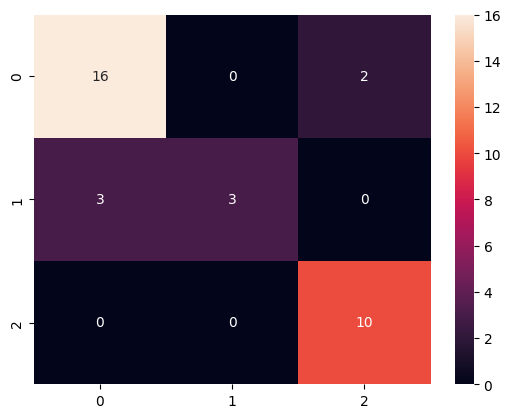

In [21]:
import seaborn as sns

sns.heatmap(c_matrix, annot=True);

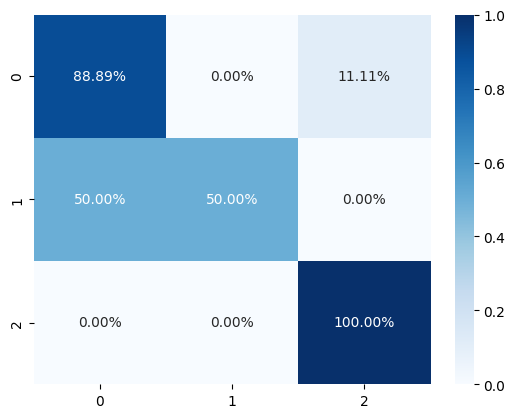

In [22]:
sns.heatmap(confusion_matrix(Y_test, predictions, normalize='true'), annot=True, 
            fmt='.2%', cmap='Blues');

[Nice confusion matrix catalog visuals examples](https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea)

Probad a ver si podéis obtener otras métricas...

In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(Y_test, predictions, average="weighted")

0.8673890608875129

In [24]:
recall_score(Y_test, predictions, average="weighted")

0.8529411764705882

In [25]:
f1_score(Y_test, predictions, average="weighted")

0.842896372308137

In [27]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       1.00      0.50      0.67         6
           2       0.83      1.00      0.91        10

    accuracy                           0.85        34
   macro avg       0.89      0.80      0.81        34
weighted avg       0.87      0.85      0.84        34



# Clasificación de nuevos registros

Veamos que sucede si aparecen nuevos registros...

In [28]:
X_new = pd.DataFrame({'duracion': [8],
                     'paginas': [5],
                     'acciones': [5],
                     'valor': [2]})
X_new

,duracion,paginas,acciones,valor
0,8,5,5,2


In [29]:
X_new.values

array([[8, 5, 5, 2]], dtype=int64)

In [30]:
clase = model.predict(X_new.values)[0]

clases[clase]

'Mac'

Está clara la clase asignada, pero ¿con qué probabilidad?

In [31]:
probabilidades = model.predict_proba(X_new.values)[0]

print(f"Se ha seleccionado la clase {clases[clase]} con una confianza asociada del {probabilidades[2]}")

Se ha seleccionado la clase Mac con una confianza asociada del 0.9999980284928149
